# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 4: Modeling Process
This notebook includes feature engineering and modeling

### Import Libraries

In [308]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

### Import Cleaned Data

In [309]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-02,3559.0,4694.0,6158.0,979.0,2115.0,4661.0,5677.0,693.0,550.0,13679.0,...,466.0,973.0,1074.0,5682.0,1816.0,161.0,1594.0,1.0,472.0,864360.0
2021-01-03,2415.0,3278.0,4571.0,647.0,1522.0,3387.0,3994.0,455.0,401.0,9582.0,...,337.0,724.0,842.0,3784.0,1130.0,59.0,648.0,2.0,354.0,578814.5
2021-01-04,5193.0,7801.0,9253.0,1800.0,3378.0,7114.0,8669.0,1921.0,903.0,21790.0,...,788.0,1429.0,2552.0,6347.5,2780.0,2309.0,1546.0,2129.0,918.0,1431732.5
2021-01-05,5333.0,8251.0,9794.0,1795.0,3630.0,7692.0,9119.0,1936.0,946.0,22314.0,...,819.0,1513.0,2677.0,8911.0,2926.0,2395.0,1492.0,2153.0,956.0,1472308.5
2021-01-06,5468.0,8467.0,9972.0,1832.0,3850.0,7622.0,9131.0,2021.0,938.0,21924.0,...,841.0,1528.0,2609.0,9127.0,2840.0,2403.0,1560.0,2202.0,932.0,1496078.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,5268.0,9454.0,9604.0,1807.0,3424.0,6846.0,10372.0,2273.0,980.0,22645.0,...,767.0,1426.0,2831.0,8939.0,2626.0,2408.0,1791.0,2245.0,1012.0,1481004.0
2021-03-16,5603.0,9833.0,9215.0,1870.0,3857.0,7587.0,10726.0,2402.0,933.0,23895.0,...,795.0,1531.0,2912.0,8538.0,2753.0,2489.0,1759.0,2356.0,862.0,1544414.0
2021-03-17,5615.0,9971.0,9383.0,1876.0,3944.0,7410.0,11243.0,2395.0,1026.0,23802.0,...,803.0,1565.0,2984.0,9219.0,2811.0,2472.0,1808.0,2494.0,923.0,1611455.0


### Define Dickey-Fuller Test Function

In [310]:
def dickey_fuller(series):
    dftest = adfuller(series)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)
    print ('\nResults of Dickey-Fuller test: \n')
    print(dfoutput)

# Remove Trends
Compare and contrast the different methods for removing trends and seasonality in time series data including differencing, rolling means, and log transformations to reduce non-stationarity



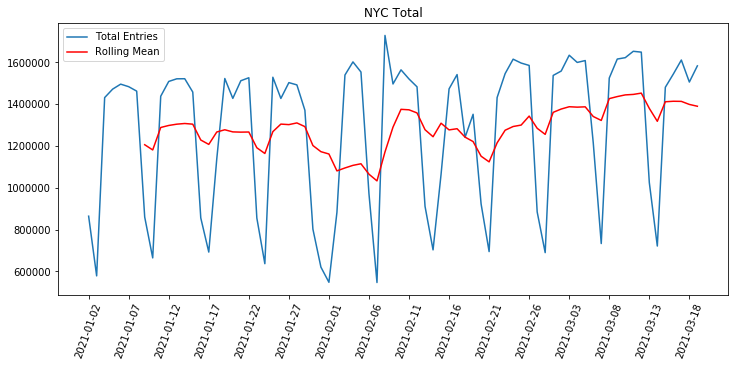

In [311]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
ax = sns.lineplot( data=df["TOTAL"], label="Total Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total');

Current data contains both Trends and Seasonality
<br>
**Trend:** Varying mean over time
<br>
**Seasonality:** Certain variations at specific time-frames
## Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

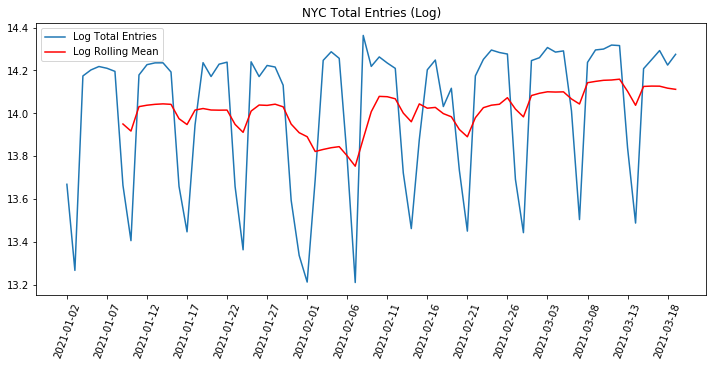

In [312]:
log_roll_mean = np.log(df["TOTAL"]).rolling(window=8, center=False).mean()
log_data = np.log(df["TOTAL"])

plt.figure(figsize=(12,5));
ax = sns.lineplot( data= log_data, label="Log Total Entries");
plt.plot(log_roll_mean, color='red', label='Log Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log)');

In [313]:
# Drop the missing values from time series calculated above
log_data.dropna(inplace=True)

### Check Stationarity with Dickey Fuller Test

In [314]:
dickey_fuller(log_data)


(-1.670070871208654, 0.4465950646244551, 6, 70, {'1%': -3.5274258688046647, '5%': -2.903810816326531, '10%': -2.5893204081632653}, -1.3939217734455838)

Results of Dickey-Fuller test: 

Test Statistic                 -1.670071
p-value                         0.446595
#Lags Used                      6.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


## Subtract Rolling Mean

In [315]:
# Subtract the moving average from the original data
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
data_minus_roll_mean = df["TOTAL"] - roll_mean
data_minus_roll_mean.head(15)

DATE
2021-01-02            NaN
2021-01-03            NaN
2021-01-04            NaN
2021-01-05            NaN
2021-01-06            NaN
2021-01-07            NaN
2021-01-08            NaN
2021-01-09   -345999.0625
2021-01-10   -516512.2500
2021-01-11    149515.6250
2021-01-12    210575.4375
2021-01-13    217023.4375
2021-01-14    214198.8125
2021-01-15    153680.6875
2021-01-16   -372680.3750
Name: TOTAL, dtype: float64

In [316]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

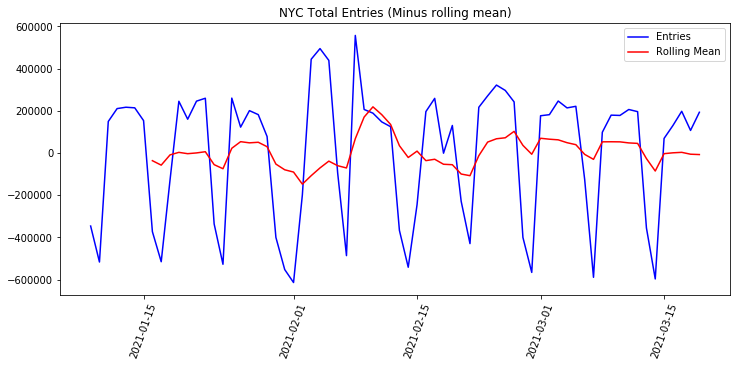

In [317]:
roll_mean = data_minus_roll_mean.rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
plt.plot(data_minus_roll_mean, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Minus rolling mean)')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%7==0]);
plt.xticks(rotation=70);


### Check Stationarity with Dickey Fuller Test

In [318]:
dickey_fuller(data_minus_roll_mean)


(-4.832243358275338, 4.716611264745652e-05, 11, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 1600.9769851467156)

Results of Dickey-Fuller test: 

Test Statistic                 -4.832243
p-value                         0.000047
#Lags Used                     11.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


## Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). 

In [319]:
data_diff = df["TOTAL"].diff(periods=1)

In [320]:
# Drop the missing values from time series calculated above
data_diff.dropna(inplace=True)

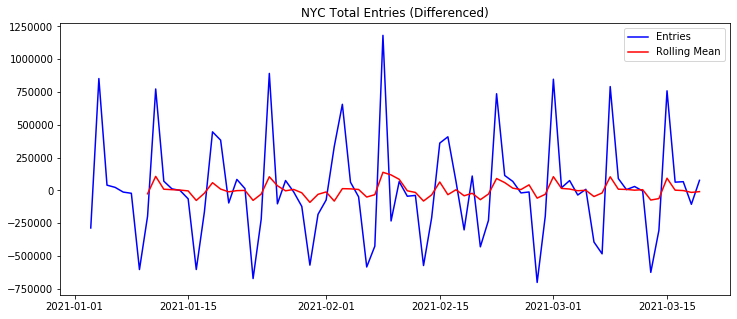

In [321]:
roll_mean = data_diff.rolling(window=8, center=False).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(data_diff, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Differenced)')
plt.show(block=False)

### Confirm Stationarity with Dickey Fuller Test

In [322]:
dickey_fuller(data_diff)


(-6.737149105953995, 3.186172106057827e-09, 12, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 1725.7197068501098)

Results of Dickey-Fuller test: 

Test Statistic                -6.737149e+00
p-value                        3.186172e-09
#Lags Used                     1.200000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


## Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

**Seasonal:** Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
<br>
**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
<br>
**Random:** Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

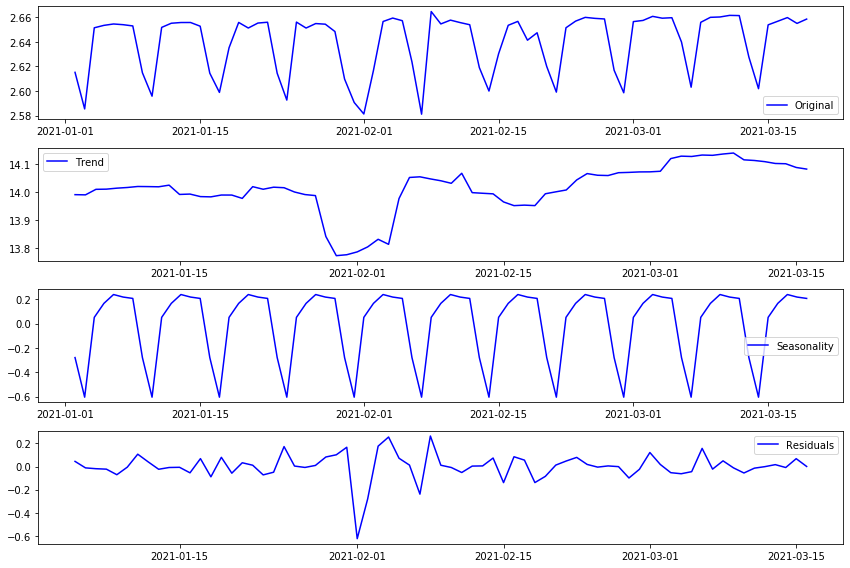

In [323]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['TOTAL']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(np.log(df['TOTAL'])), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Check Stationarity of Residuals with Dickey Fuller

In [324]:
# Drop missing values from residuals 
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
dickey_fuller(df_log_decompose)


(-6.327676991443556, 2.9587457027387526e-08, 6, 64, {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}, -92.42789589379743)

Results of Dickey-Fuller test: 

Test Statistic                -6.327677e+00
p-value                        2.958746e-08
#Lags Used                     6.000000e+00
Number of Observations Used    6.400000e+01
Critical Value (1%)           -3.536928e+00
Critical Value (5%)           -2.907887e+00
Critical Value (10%)          -2.591493e+00
dtype: float64


# Autocorrelation
Processes with greater autocorrelation are more predictable than those without any form of autocorrelation. This process compares each value in the time series with it's previous value. This is called "lag 1 autocorrelation".

In [325]:
# shift the series forward by 1 lag
total = df['TOTAL']
total_shift_1 = total.shift(periods=1)
lag_1 = pd.concat([total_shift_1, total], axis=1)
lag_1.corr()

,TOTAL,TOTAL
TOTAL,1.00000,0.40031
TOTAL,0.40031,1.00000


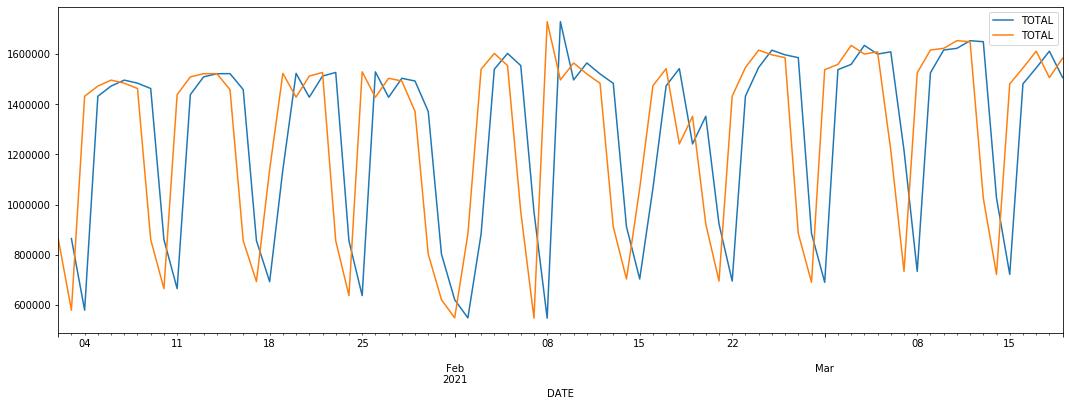

In [326]:
lag_1.plot(figsize=(18,6));

## Autocorrelation Function
The autocorrelation function (often abbreviated to ACF) provides a summary of the autocorrelations for each lag. 
- It's a function that represents autocorrelation of a time series as a function of the time lag.
- The dotted lines in the plot tell you about the statistical significance of the correlation.

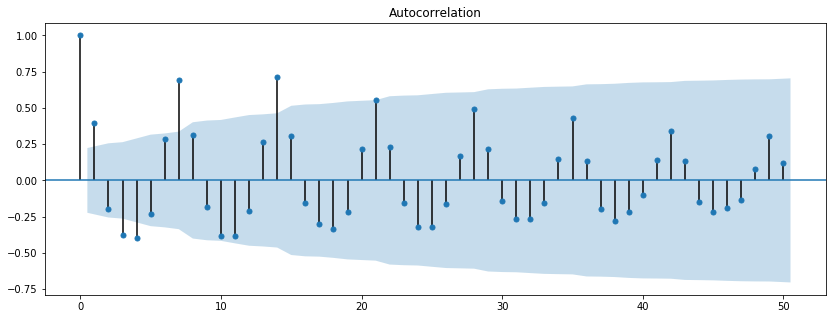

In [327]:
# Try the Statsmodels ACF just for shits
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(df['TOTAL'], lags=50);

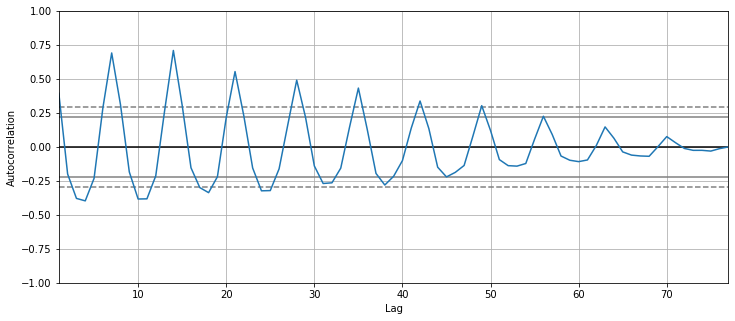

In [328]:
# Try the Pandas AC Function
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(df['TOTAL']);

Plot above shows consistent spikes at each multiple of 7. Correlation is statistically significant for first ~30 days.
### Autocorrelation with Differencing

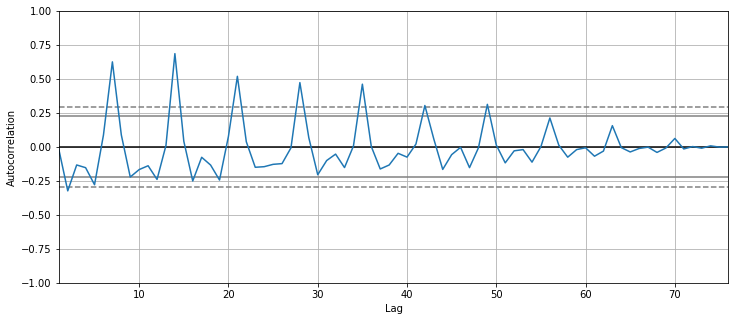

In [329]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(data_diff);

The differenced ACF seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 7 seems consistently statistically significant, while it decays for longer time lags.
## Partial Autocorrelation Function
Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags (unlike the autocorrelation function, which does not control for other lags). 
- PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, with the relationships of intervening observations removed.
- PACF can be interpreted as a regression of the series against its past lags. 
- It helps to come up with a possible order for the auto regressive term. 
The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

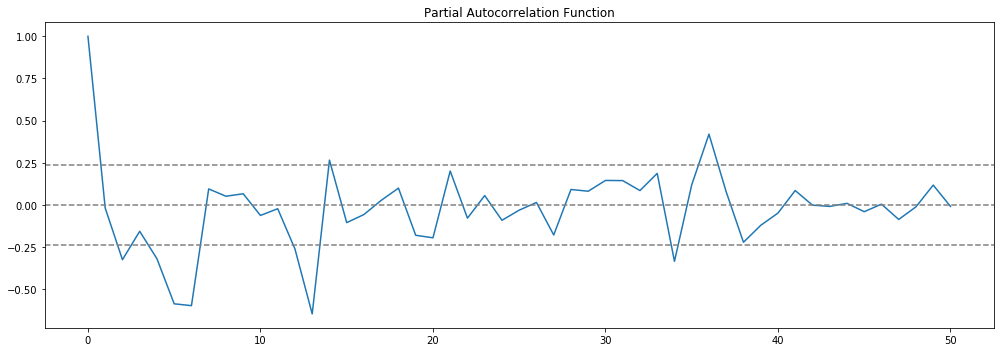

In [330]:
from statsmodels.tsa.stattools import acf, pacf

lag_pacf = pacf(data_diff, nlags=50, method='ols')
plt.plot(lag_pacf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(total_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(total_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARMA Model
Regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part). ARMA is generally denoted as ARMA(p, q).
- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## Autogregressive (AR) Model 
An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process

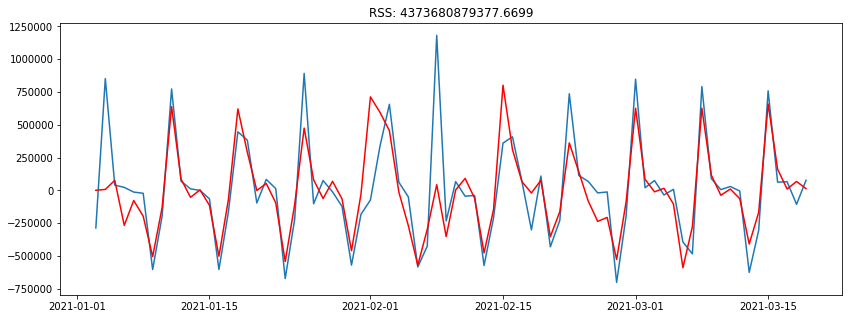

In [345]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

ar_model = ARIMA(data_diff, order=(7, 0, 0))  
results_AR = ar_model.fit(disp=-1)  
plt.plot(data_diff);
plt.plot(results_AR.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - data_diff)**2));

## Moving Average (MA) Model
The Moving Average model can be described as the weighted sum of today's and yesterday's noise.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process

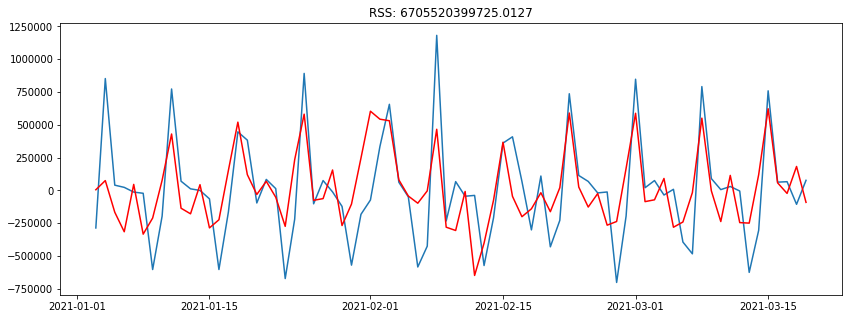

In [355]:
ma_model = ARIMA(data_diff, order=(0, 0, 6))  
results_MA = ma_model.fit(disp=-1)  
plt.plot(data_diff)
plt.plot(results_MA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - data_diff)**2));

# Combined Model
Combines AR and MA

In [348]:
def rebuild_diffed(series, first_element_original):
    cumsum = series.cumsum()
    return cumsum.fillna(0) + first_element_original

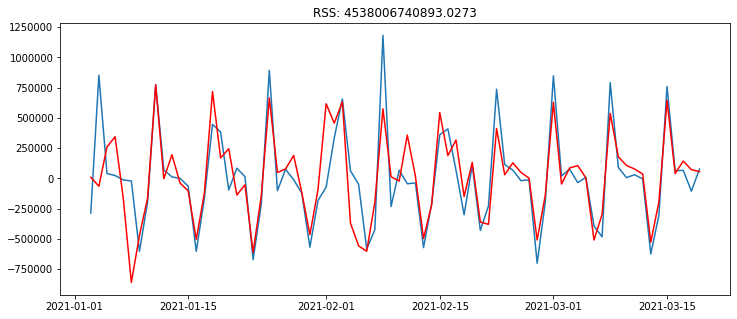

In [362]:
plt.figure(figsize=(12,5));
arima_model = ARIMA(data_diff, order=(6, 0, 4))  
results_ARIMA = arima_model.fit(disp=-1)  
plt.plot(data_diff)
plt.plot(results_ARIMA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - data_diff)**2));

In [363]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
preds = rebuild_diffed(predictions_ARIMA_diff, df['TOTAL'].iloc[0])

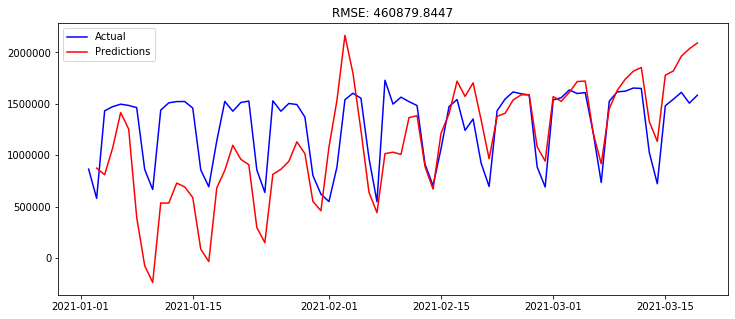

In [364]:
plt.figure(figsize=(12,5));
plt.plot(df['TOTAL'], color='blue', label = "Actual");
plt.plot(preds, color='red', label="Predictions");
plt.title('RMSE: %.4f'% np.sqrt(sum((preds - df['TOTAL']).dropna()**2)/len(df['TOTAL'])));
plt.legend(loc='best');